In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
r300k = {'width': [1.4, 1.3, 1, 0.75, 0.5, 0.35, 1, 1, 1], 
     'res': [224, 224, 224, 224, 224, 224, 192, 160, 128], 
     'IOU=0.5': [0.140, 0.143, 0.127, 0.123, 0.091, 0.071, 0.112, 0.091, 0.059], 
     'IOU=0.75': [0.075, 0.077, 0.068, 0.061, 0.046, 0.033, 0.057, 0.040, 0.026], 
     'IOU=0.5:0.95': [0.076, 0.078, 0.071,0.066, 0.050, 0.037, 0.060, 0.047, 0.030], 
     'speed': [0.095,0.085, 0.064,0.059, 0.044, 0.040, 0.060, 0.051, 0.049],
     'FLOPs': [8457, 8457, 8457, 8457, 8457, 8457, 6233, 4637, 2937],
     'Params': [7830962, 6987077, 4707674, 3130714, 1815098, 1154634, 4707674, 4707674, 4707674]
    }
r800k = {'width': [1.3, 1, 0.75, 0.5], 
     'res': [224, 224, 224, 224], 
     'IOU=0.5': [0.166,  0.145, 0.124, 0.104], 
     'IOU=0.75': [0.086, 0.077, 0.065, 0.054], 
     'IOU=0.5:0.95': [0.089, 0.079, 0.067, 0.056], 
     'speed': [0.084, 0.065, 0.055, 0.044],
     'FLOPs': [8457, 8457, 8457, 8457],
     'Params': [6987077, 4707674, 3130714, 1815098]
    }
df = pd.DataFrame(data=r300k)
df2 = pd.DataFrame(data=r800k)
df

,width,res,IOU=0.5,IOU=0.75,IOU=0.5:0.95,speed,FLOPs,Params
0,1.40,224,0.140,0.075,0.076,0.095,8457,7830962
1,1.30,224,0.143,0.077,0.078,0.085,8457,6987077
2,1.00,224,0.127,0.068,0.071,0.064,8457,4707674
3,0.75,224,0.123,0.061,0.066,0.059,8457,3130714
4,0.50,224,0.091,0.046,0.050,0.044,8457,1815098
5,0.35,224,0.071,0.033,0.037,0.040,8457,1154634
6,1.00,192,0.112,0.057,0.060,0.060,6233,4707674
7,1.00,160,0.091,0.040,0.047,0.051,4637,4707674
8,1.00,128,0.059,0.026,0.030,0.049,2937,4707674


[]

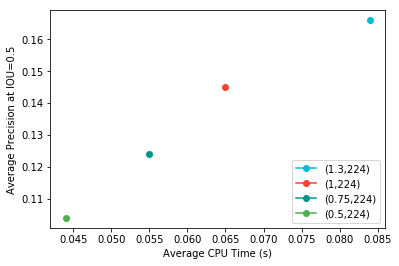

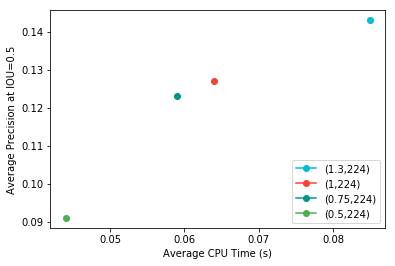

In [9]:
df2
# speed vs accuracy for 800k
ax = df2.loc[(df2['width']==1.3) & (df2['res']==224)].plot(x='speed', y='IOU=0.5', color='#00bcd4', marker='o', label='(1.3,224)')
df2.loc[(df2['width']==1) & (df2['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#f44336', marker='o', label='(1,224)')
df2.loc[(df2['width']==0.75) & (df2['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#009688', marker='o', label='(0.75,224)')
df2.loc[(df2['width']==0.5) & (df2['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#4caf50', marker='o', label='(0.5,224)')
ax.set_xlabel('Average CPU Time (s)') 
ax.set_ylabel('Average Precision at IOU=0.5')
ax.legend(loc='lower right')
#ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
ax.plot()

ax = df.loc[(df['width']==1.3) & (df['res']==224)].plot(x='speed', y='IOU=0.5', color='#00bcd4', marker='o', label='(1.3,224)')
df.loc[(df['width']==1) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#f44336', marker='o', label='(1,224)')
df.loc[(df['width']==0.75) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#009688', marker='o', label='(0.75,224)')
df.loc[(df['width']==0.5) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#4caf50', marker='o', label='(0.5,224)')
ax.set_xlabel('Average CPU Time (s)') 
ax.set_ylabel('Average Precision at IOU=0.5')
ax.legend(loc='lower right')
#ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
ax.plot()

In [5]:
# table comparing accuracy and speed at varying width and constant resolution
df.loc[df['res']==224]

,width,res,IOU=0.5,IOU=0.75,IOU=0.5:0.95,speed,FLOPs,Params
0,1.40,224,0.140,0.075,0.076,0.095,8457,7830962
1,1.30,224,0.143,0.077,0.078,0.085,8457,6987077
2,1.00,224,0.127,0.068,0.071,0.064,8457,4707674
3,0.75,224,0.123,0.061,0.066,0.059,8457,3130714
4,0.50,224,0.091,0.046,0.050,0.044,8457,1815098
5,0.35,224,0.071,0.033,0.037,0.040,8457,1154634


[]

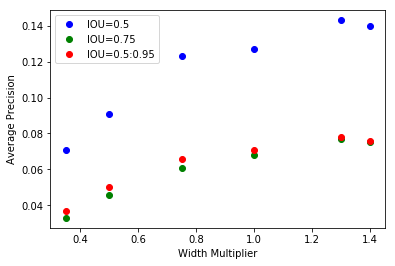

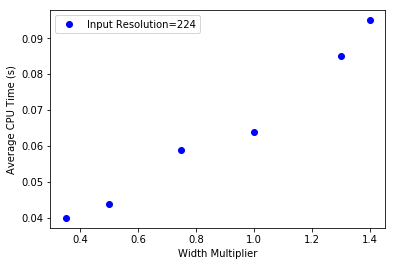

In [7]:
# varying width, constant resolution with different IoUs
ap_width = df.loc[df['res']==224]
ax = ap_width.plot(x='width', y='IOU=0.5', style='bo')
ap_width.plot(ax=ax, x='width', y='IOU=0.75', style='go')
ap_width.plot(ax=ax, x='width', y='IOU=0.5:0.95', style='ro')
ax.set_xlabel('Width Multiplier')
ax.set_ylabel('Average Precision')
ax.legend()
ax.plot()

speed_width = df.loc[df['res']==224]
ax = speed_width.plot(x='width', y='speed', style='bo', label='Input Resolution=224')
ax.set_xlabel('Width Multiplier')
ax.set_ylabel('Average CPU Time (s)')
ax.plot()

In [8]:
# table comparing accuracy and speed with varying resolution
df.loc[df['width']==1]

,width,res,IOU=0.5,IOU=0.75,IOU=0.5:0.95,speed,FLOPs,Params
2,1.0,224,0.127,0.068,0.071,0.064,8457,4707674
6,1.0,192,0.112,0.057,0.060,0.060,6233,4707674
7,1.0,160,0.091,0.040,0.047,0.051,4637,4707674
8,1.0,128,0.059,0.026,0.030,0.049,2937,4707674


[]

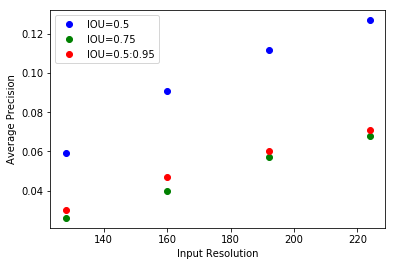

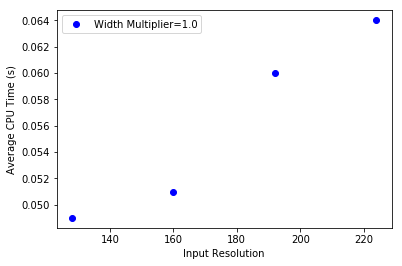

In [11]:
# varying resolution, constant width with different IoUs
ap_res = df.loc[df['width']==1]
ax = ap_res.plot(x='res', y='IOU=0.5', style='bo')
ap_res.plot(ax=ax, x='res', y='IOU=0.75', style='go')
ap_res.plot(ax=ax, x='res', y='IOU=0.5:0.95', style='ro')
ax.set_xlabel('Input Resolution')
ax.set_ylabel('Average Precision')
ax.legend()
ax.plot()

speed_res = df.loc[df['width']==1]
ax = speed_res.plot(x='res', y='speed', style='bo', label='Width Multiplier=1.0')
ax.set_xlabel('Input Resolution')
ax.set_ylabel('Average CPU Time (s)')
ax.plot()

[]

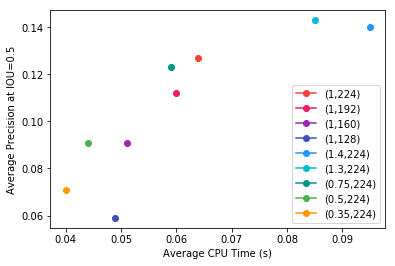

In [17]:
# speed vs accuracy for all models 
ax = df.loc[(df['width']==1) & (df['res']==224)].plot(x='speed', y='IOU=0.5', color='#f44336', marker='o', label='(1,224)')
df.loc[(df['width']==1) & (df['res']==192)].plot(ax=ax, x='speed', y='IOU=0.5', color='#e91e63', marker='o', label='(1,192)')
df.loc[(df['width']==1) & (df['res']==160)].plot(ax=ax, x='speed', y='IOU=0.5', color='#9c27b0', marker='o', label='(1,160)')
df.loc[(df['width']==1) & (df['res']==128)].plot(ax=ax, x='speed', y='IOU=0.5', color='#3f51b5', marker='o', label='(1,128)')
df.loc[(df['width']==1.4) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#2196f3', marker='o', label='(1.4,224)')
df.loc[(df['width']==1.3) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#00bcd4', marker='o', label='(1.3,224)')
df.loc[(df['width']==0.75) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#009688', marker='o', label='(0.75,224)')
df.loc[(df['width']==0.5) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#4caf50', marker='o', label='(0.5,224)')
df.loc[(df['width']==0.35) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', color='#ff9800', marker='o', label='(0.35,224)')
ax.set_xlabel('Average CPU Time (s)') 
ax.set_ylabel('Average Precision at IOU=0.5')
ax.legend(loc='lower right')
#ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
ax.plot()

[]

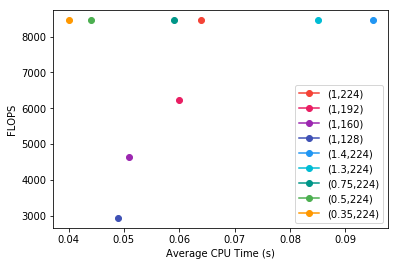

In [27]:
# speed vs flops
#speed = df['speed']
#flops = df['FLOPs']
ax = df.loc[(df['width']==1) & (df['res']==224)].plot(x='speed', y='FLOPs', color='#f44336', marker='o', label='(1,224)')
df.loc[(df['width']==1) & (df['res']==192)].plot(ax=ax, x='speed', y='FLOPs', color='#e91e63', marker='o', label='(1,192)')
df.loc[(df['width']==1) & (df['res']==160)].plot(ax=ax, x='speed', y='FLOPs', color='#9c27b0', marker='o', label='(1,160)')
df.loc[(df['width']==1) & (df['res']==128)].plot(ax=ax, x='speed', y='FLOPs', color='#3f51b5', marker='o', label='(1,128)')
df.loc[(df['width']==1.4) & (df['res']==224)].plot(ax=ax, x='speed', y='FLOPs', color='#2196f3', marker='o', label='(1.4,224)')
df.loc[(df['width']==1.3) & (df['res']==224)].plot(ax=ax, x='speed', y='FLOPs', color='#00bcd4', marker='o', label='(1.3,224)')
df.loc[(df['width']==0.75) & (df['res']==224)].plot(ax=ax, x='speed', y='FLOPs', color='#009688', marker='o', label='(0.75,224)')
df.loc[(df['width']==0.5) & (df['res']==224)].plot(ax=ax, x='speed', y='FLOPs', color='#4caf50', marker='o', label='(0.5,224)')
df.loc[(df['width']==0.35) & (df['res']==224)].plot(ax=ax, x='speed', y='FLOPs', color='#ff9800', marker='o', label='(0.35,224)')
ax.set_xlabel('Average CPU Time (s)') 
ax.set_ylabel('FLOPS')
ax.legend(loc='lower right')
ax.plot()

[]

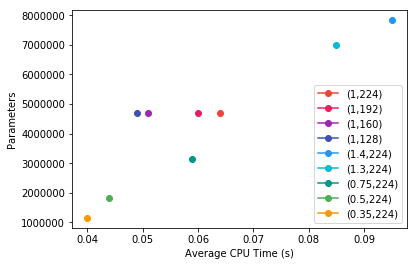

In [28]:
# speed vs parameters
ax = df.loc[(df['width']==1) & (df['res']==224)].plot(x='speed', y='Params', color='#f44336', marker='o', label='(1,224)')
df.loc[(df['width']==1) & (df['res']==192)].plot(ax=ax, x='speed', y='Params', color='#e91e63', marker='o', label='(1,192)')
df.loc[(df['width']==1) & (df['res']==160)].plot(ax=ax, x='speed', y='Params', color='#9c27b0', marker='o', label='(1,160)')
df.loc[(df['width']==1) & (df['res']==128)].plot(ax=ax, x='speed', y='Params', color='#3f51b5', marker='o', label='(1,128)')
df.loc[(df['width']==1.4) & (df['res']==224)].plot(ax=ax, x='speed', y='Params', color='#2196f3', marker='o', label='(1.4,224)')
df.loc[(df['width']==1.3) & (df['res']==224)].plot(ax=ax, x='speed', y='Params', color='#00bcd4', marker='o', label='(1.3,224)')
df.loc[(df['width']==0.75) & (df['res']==224)].plot(ax=ax, x='speed', y='Params', color='#009688', marker='o', label='(0.75,224)')
df.loc[(df['width']==0.5) & (df['res']==224)].plot(ax=ax, x='speed', y='Params', color='#4caf50', marker='o', label='(0.5,224)')
df.loc[(df['width']==0.35) & (df['res']==224)].plot(ax=ax, x='speed', y='Params', color='#ff9800', marker='o', label='(0.35,224)')
ax.set_xlabel('Average CPU Time (s)') 
ax.set_ylabel('Parameters')
ax.legend(loc='lower right')
ax.plot()